# Deep Q-Learning 

Install dependencies for AI gym to run properly (shouldn't take more than a minute). If running on google cloud or running locally, only need to run once. Colab may require installing everytime the vm shuts down.

In [1]:
!pip3 install gym pyvirtualdisplay
!sudo apt-get install -y xvfb python-opengl ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl xvfb
0 upgraded, 2 newly installed, 0 to remove and 34 not upgraded.
Need to get 1,281 kB of archives.
After this operation, 7,686 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.9 [784 kB]
Fetched 1,281 kB in 1s (885 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm lin

In [2]:
!pip3 install --upgrade setuptools --user
!pip3 install ez_setup 
!pip3 install gym[atari] 

     |████████████████████████████████| 788kB 8.3MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.


  Created wheel for ez-setup: filename=ez_setup-0.9-cp37-none-any.whl size=11014 sha256=65d80f49d271bcc22c01618d28622def2e9ecb3d63e35992b03ad508096b8608
  Stored in directory: /root/.cache/pip/wheels/dc/e8/6b/3d5ff5a3efd7b5338d1e173ac981771e2628ceb2f7866d49ad
Successfully built ez-setup


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
import os
HOME_DIR = os.getcwd()
PWD = os.path.join(HOME_DIR, 'gdrive', 'MyDrive', 'Colab Notebooks', 'CS498', 'assignment5_materials')
print(PWD)
os.chdir(PWD)
# print(HOME_DIR)

/content/gdrive/MyDrive/Colab Notebooks/CS498/assignment5_materials


For this assignment we will implement the Deep Q-Learning algorithm with Experience Replay as described in breakthrough paper __"Playing Atari with Deep Reinforcement Learning"__. We will train an agent to play the famous game of __Breakout__.

In [19]:
%matplotlib inline

import sys
import gym
import torch
import pylab
import random
import numpy as np
from collections import deque
from datetime import datetime
from copy import deepcopy
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from model import DQN
from utils import find_max_lives, check_live, get_frame, get_init_state
from config import *

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 1
%aimport agent
%aimport agent_double
%aimport config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from config import *
train_frame

100000

## Understanding the environment

In the following cell, we initialize our game of __Breakout__ and you can see how the environment looks like. For further documentation of the of the environment refer to https://gym.openai.com/envs. 

In breakout, we will use 3 actions "fire", "left", and "right". "fire" is only used to reset the game when a life is lost, "left" moves the agent left and "right" moves the agent right.

In [7]:
env = gym.make('BreakoutDeterministic-v4')
state = env.reset()

In [8]:
number_lives = find_max_lives(env)
state_size = env.observation_space.shape
action_size = 3 #fire, left, and right

## Creating a DQN Agent

Here we create a DQN Agent. This agent is defined in the __agent.py__. The corresponding neural network is defined in the __model.py__. Once you've created a working DQN agent, use the code in agent.py to create a double DQN agent in __agent_double.py__. Set the flag "double_dqn" to True to train the double DQN agent.

__Evaluation Reward__ : The average reward received in the past 100 episodes/games.

__Frame__ : Number of frames processed in total.

__Memory Size__ : The current size of the replay memory.

In [26]:
double_dqn = True # set to True if using double DQN agent

if double_dqn:
    from agent_double import Agent
    model_type = "double_dqn"
else:
    from agent import Agent
    model_type = "deep_qn"

agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

### Main Training Loop

In this training loop, we do not render the screen because it slows down training signficantly. To watch the agent play the game, run the code in next section "Visualize Agent Performance"

Here, we do not report the entire training history. For this history, please see the attached notebook. Rather, we only showcase the final plots from training both vanilla DQN and DDQN networks for the Breakout task.

episode: 0   score: 4.0   memory length: 257   epsilon: 1.0    steps: 257    lr: 0.0001     evaluation reward: 4.0
episode: 1   score: 2.0   memory length: 472   epsilon: 1.0    steps: 215    lr: 0.0001     evaluation reward: 3.0
episode: 2   score: 2.0   memory length: 670   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 2.6666666666666665
episode: 3   score: 1.0   memory length: 839   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 2.25
episode: 4   score: 0.0   memory length: 962   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.8
episode: 5   score: 3.0   memory length: 1190   epsilon: 1.0    steps: 228    lr: 0.0001     evaluation reward: 2.0
episode: 6   score: 4.0   memory length: 1465   epsilon: 1.0    steps: 275    lr: 0.0001     evaluation reward: 2.2857142857142856
episode: 7   score: 4.0   memory length: 1781   epsilon: 1.0    steps: 316    lr: 0.0001     evaluation reward: 2.5
episode: 8   score: 4.0   memory length: 2075 

/content/gdrive/MyDrive/Colab Notebooks/CS498/assignment5_materials/memory.py:30: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  sample = np.array(sample)
/content/gdrive/MyDrive/Colab Notebooks/CS498/assignment5_materials/agent_double.py:81: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  mini_batch = np.array(mini_batch).transpose()


episode: 548   score: 1.0   memory length: 100028   epsilon: 0.9999425800000012    steps: 169    lr: 0.0001     evaluation reward: 1.72
episode: 549   score: 3.0   memory length: 100254   epsilon: 0.999495100000011    steps: 226    lr: 0.0001     evaluation reward: 1.71
episode: 550   score: 2.0   memory length: 100452   epsilon: 0.9991030600000195    steps: 198    lr: 0.0001     evaluation reward: 1.73
episode: 551   score: 1.0   memory length: 100603   epsilon: 0.998804080000026    steps: 151    lr: 0.0001     evaluation reward: 1.71
episode: 552   score: 0.0   memory length: 100725   epsilon: 0.9985625200000312    steps: 122    lr: 0.0001     evaluation reward: 1.7
episode: 553   score: 1.0   memory length: 100894   epsilon: 0.9982279000000385    steps: 169    lr: 0.0001     evaluation reward: 1.68
episode: 554   score: 3.0   memory length: 101143   epsilon: 0.9977348800000492    steps: 249    lr: 0.0001     evaluation reward: 1.7
episode: 555   score: 3.0   memory length: 101390   

KeyboardInterrupt: ignored

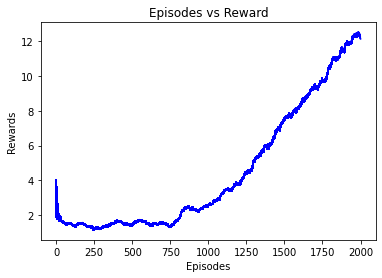

In [ ]:
rewards, episodes = [], []
best_eval_reward = 0
for e in range(EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    d = False
    state = env.reset()
    next_state = state
    life = number_lives

    get_init_state(history, state)

    while not done:
        step += 1
        frame += 1

        # Perform a fire action if ball is no longer on screen to continue onto next life
        if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
            action = 0
        else:
            action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
        state = next_state
        next_state, reward, done, info = env.step(action + 1)
        
        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['ale.lives'])

        life = info['ale.lives']
        r = np.clip(reward, -1, 1) 
        r = reward

        # Store the transition in memory 
        agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
        # Start training after random sample generation
        if(frame >= train_frame):
            # print(train_frame, frame)
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN only
            if double_dqn and (frame % update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]
            
        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards') 
            pylab.title('Episodes vs Reward')
            pylab.savefig(f"./save_graph/breakout_{model_type}.png") # save graph for training visualization
            
            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

            # if the mean of scores of last 100 episode is bigger than 5 save model
            ### Change this save condition to whatever you prefer ###
            if np.mean(evaluation_reward) > 5 and np.mean(evaluation_reward) > best_eval_reward:
                torch.save(agent.policy_net.state_dict(), f"./save_model/breakout_{model_type}.pth")
                best_eval_reward = np.mean(evaluation_reward)


## Training data for DQN 

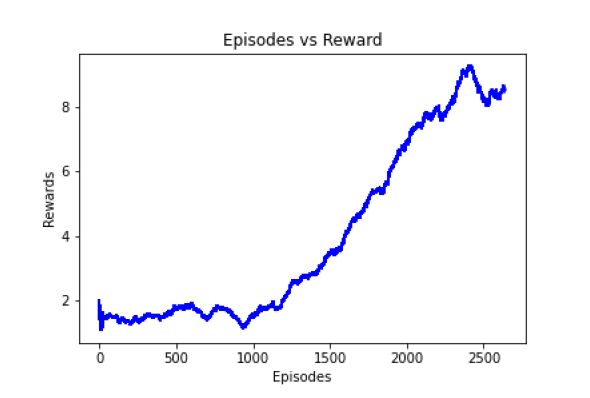

In [13]:
import matplotlib.image as mpimg
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.margins(0)
ax.set_xticks([])
ax.set_yticks([])
img = mpimg.imread('./save_graph/breakout_deep_qn.png')
pylab.imshow(img)

In [14]:
!cat ./raw_output/dqn_output.txt

episode: 0   score: 2.0   memory length: 198   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 2.0
episode: 1   score: 1.0   memory length: 367   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.5
episode: 2   score: 2.0   memory length: 550   epsilon: 1.0    steps: 183    lr: 0.0001     evaluation reward: 1.6666666666666667
episode: 3   score: 2.0   memory length: 748   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.75
episode: 4   score: 0.0   memory length: 871   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.4
episode: 5   score: 2.0   memory length: 1089   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.5
episode: 6   score: 2.0   memory length: 1287   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.5714285714285714
episode: 7   score: 0.0   memory length: 1410   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.375
episode: 8   score: 0.0   memory length: 153

## Training data for DDQN 

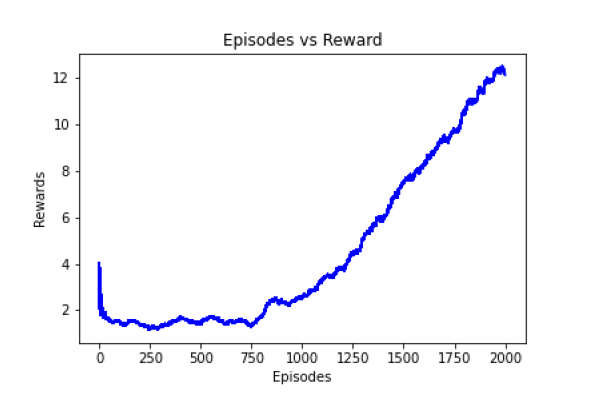

In [15]:
import matplotlib.image as mpimg
fig = plt.figure(figsize=(8,8))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.margins(0)
ax.set_xticks([])
ax.set_yticks([])
img = mpimg.imread('./save_graph/breakout_double_dqn.png')
pylab.imshow(img)

In [16]:
!cat ./raw_output/ddqn_output.txt

episode: 0   score: 4.0   memory length: 257   epsilon: 1.0    steps: 257    lr: 0.0001     evaluation reward: 4.0
episode: 1   score: 2.0   memory length: 472   epsilon: 1.0    steps: 215    lr: 0.0001     evaluation reward: 3.0
episode: 2   score: 2.0   memory length: 670   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 2.6666666666666665
episode: 3   score: 1.0   memory length: 839   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 2.25
episode: 4   score: 0.0   memory length: 962   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.8
episode: 5   score: 3.0   memory length: 1190   epsilon: 1.0    steps: 228    lr: 0.0001     evaluation reward: 2.0
episode: 6   score: 4.0   memory length: 1465   epsilon: 1.0    steps: 275    lr: 0.0001     evaluation reward: 2.2857142857142856
episode: 7   score: 4.0   memory length: 1781   epsilon: 1.0    steps: 316    lr: 0.0001     evaluation reward: 2.5
episode: 8   score: 4.0   memory length: 2075 

# Visualize Agent Performance

BE AWARE THIS CODE BELOW MAY CRASH THE KERNEL IF YOU RUN THE SAME CELL TWICE.

Please save your model before running this portion of the code.

In [ ]:
if False:
  torch.save(agent.policy_net.state_dict(), f"./save_model/breakout_{model_type}_latest.pth")

In [22]:
from gym.wrappers import Monitor
import glob
import io
import base64

from IPython.display import HTML
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display

# Displaying the game live
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % ("Agent Playing",step, info))
    plt.axis('off')

    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
    
# Recording the game and replaying the game afterwards
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    

def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env

In [27]:
display = Display(visible=0, size=(300, 200))
display.start()

# Load agent
agent.load_policy_net(f"./save_model/breakout_{model_type}_latest.pth")
agent.epsilon = 0.0 # Set agent to only exploit the best action

env = gym.make('BreakoutDeterministic-v4')
env = wrap_env(env)

done = False
score = 0
step = 0
state = env.reset()
next_state = state
life = number_lives
history = np.zeros([5, 84, 84], dtype=np.uint8)
get_init_state(history, state)

while not done:
    
    # Render breakout
    env.render()
#     show_state(env,step) # uncommenting this provides another way to visualize the game

    step += 1
    frame += 1

    # Perform a fire action if ball is no longer on screen
    if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
        action = 0
    else:
        action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
    state = next_state
    
    next_state, reward, done, info = env.step(action + 1)
        
    frame_next_state = get_frame(next_state)
    history[4, :, :] = frame_next_state
    terminal_state = check_live(life, info['ale.lives'])
        
    life = info['ale.lives']
    r = np.clip(reward, -1, 1) 
    r = reward

    # Store the transition in memory 
    agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
    # Start training after random sample generation
    score += reward
    
    history[:4, :, :] = history[1:, :, :]
env.close()
show_video()
display.stop()